# Imports

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# Path to a JSON file of instance annotations for the 2017 COCO dataset validation set.

In [3]:
dataDir='./coco/'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize COCO API for manipulate instance annotations

In [4]:
coco = COCO(annFile)
print(coco)

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


# Display COCO categories and supercategories

In [5]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food accessory kitchen vehicle appliance furniture sports person indoor electronic animal outdoor


In [6]:
print(len(cats))
print(len(nms))

80
12


# Get all images containing given categories, select one at random

In [15]:
catIds = coco.getCatIds(catNms=['person','dog']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [10]:
print(catIds)
print(imgIds)
print(img)

[1, 18]
[324158]
{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


# Load and display image

[[[206 221 240]
  [192 209 225]
  [219 237 251]
  ...
  [222 226 238]
  [182 181 189]
  [ 57  58  62]]

 [[217 240 255]
  [208 231 247]
  [184 207 221]
  ...
  [228 230 245]
  [180 176 190]
  [  7   4  13]]

 [[206 233 250]
  [211 238 255]
  [217 243 255]
  ...
  [225 225 237]
  [ 89  83  93]
  [ 19  14  21]]

 ...

 [[113 106  98]
  [123 116 108]
  [143 136 128]
  ...
  [151 127 103]
  [164 138 111]
  [119  94  64]]

 [[131 122 115]
  [141 134 126]
  [133 126 118]
  ...
  [128 104  80]
  [130 106  78]
  [151 126  95]]

 [[133 126 118]
  [130 123 115]
  [114 107  99]
  ...
  [134 112  89]
  [150 126  98]
  [176 151 120]]]


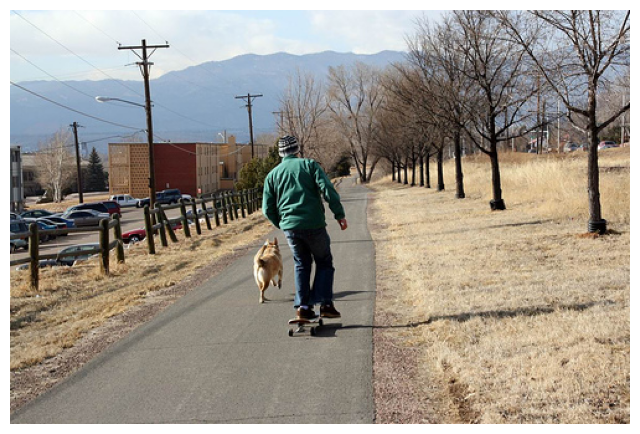

In [16]:
# variable 'I' represents an image
I = io.imread(img['coco_url'])
print(I)
plt.axis('off')
plt.imshow(I)
plt.show()

# Load and display instance annotations

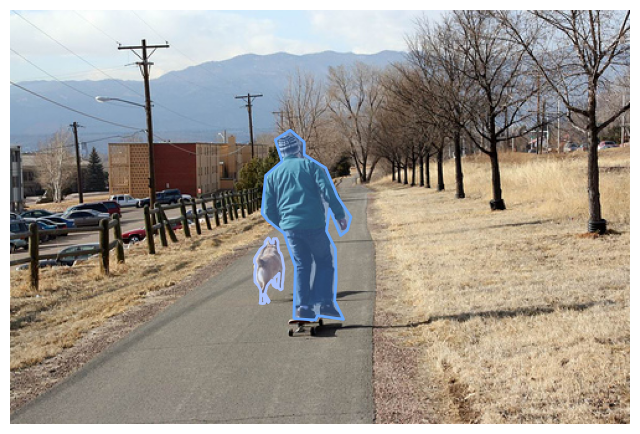

In [17]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

# Initialize COCO API for person keypoints annotations

In [18]:
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


# Load and display Keypoints annotations

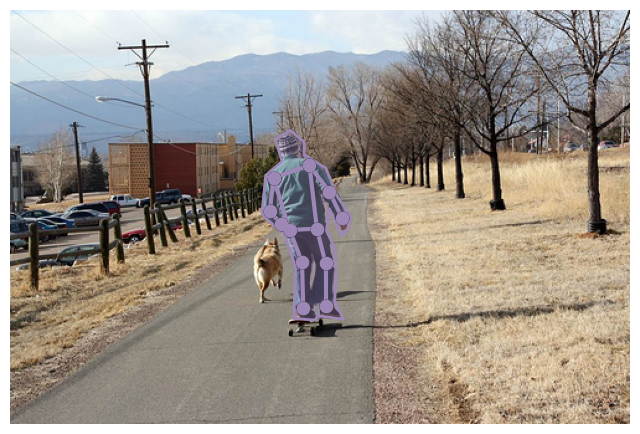

In [14]:
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)